In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [5]:
# checking the shape of the data 
lead_data.shape

(9240, 37)

In [6]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From above description about counts, we can see that there are missing values present in our data.

### Data Cleaning

##### 1)Handling the 'Select' level that is present in many of the categorical variables.¶
We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [8]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [9]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [11]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [12]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

##### 1) Column: 'Specialization'
This column has 37% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

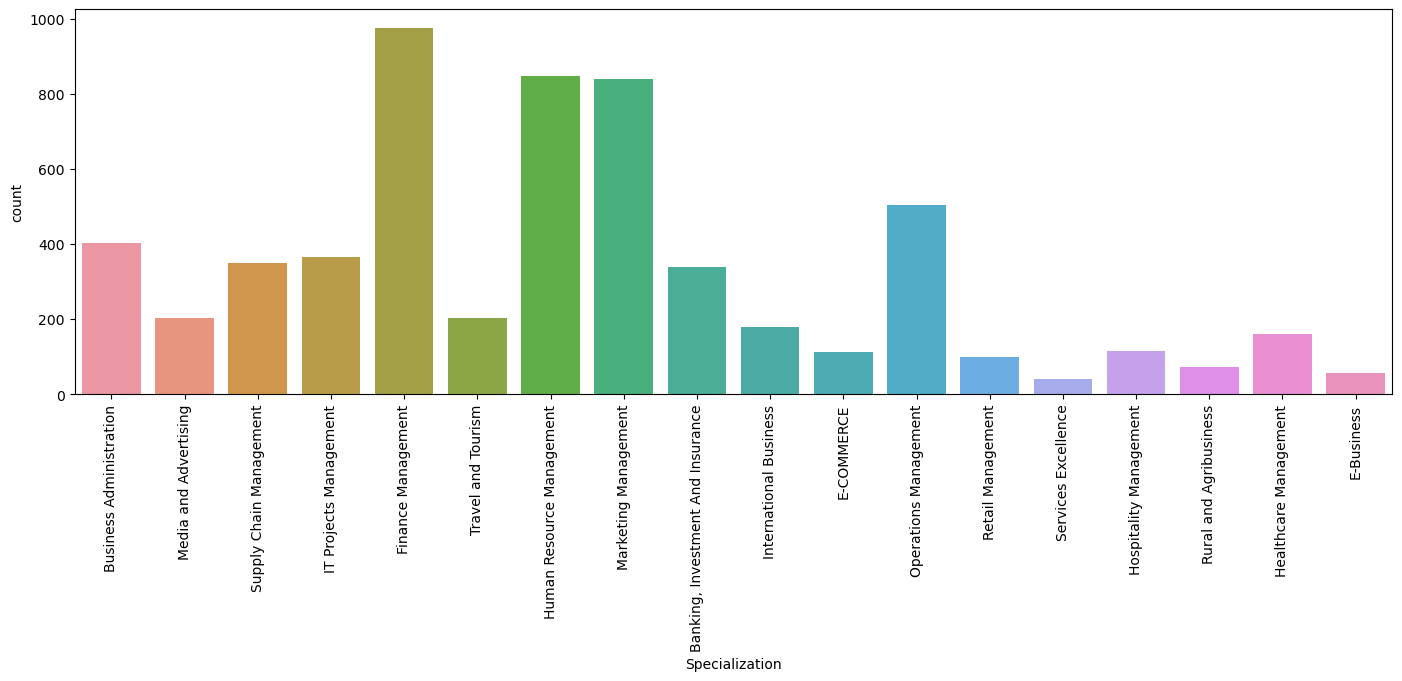

In [13]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [14]:
# Creating a separate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

##### 2) Tags column
'Tags' column has 36% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

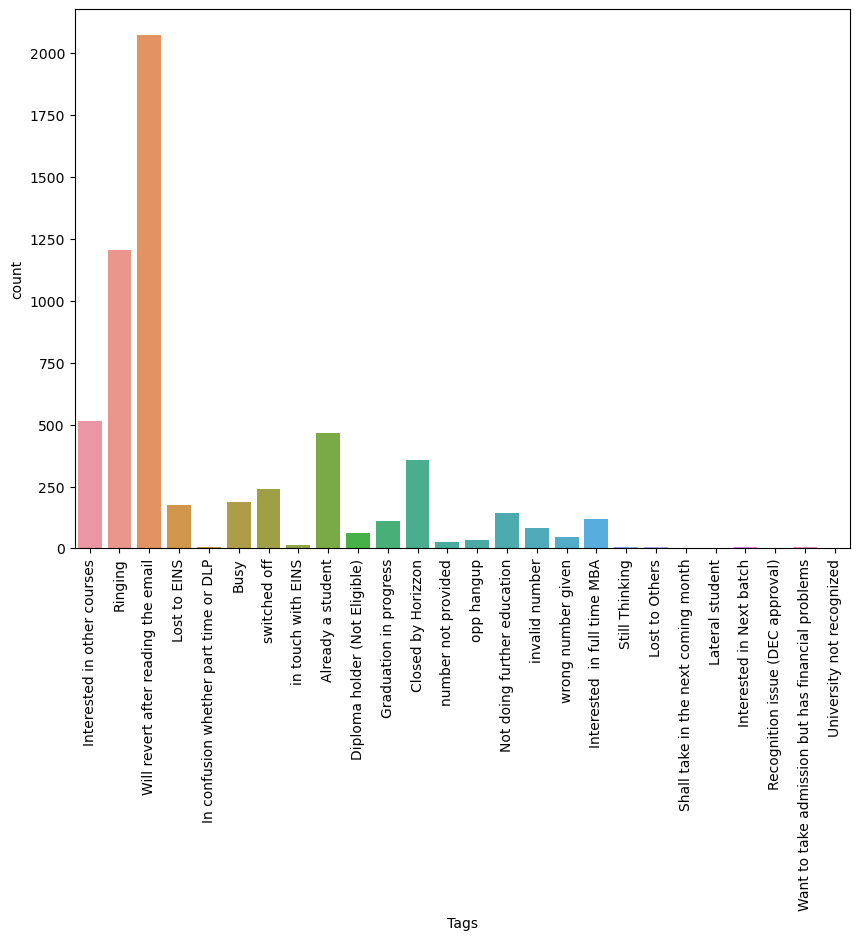

In [15]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [17]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

##### 3) Column: 'What matters most to you in choosing a course'
this column has 29% missing values

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

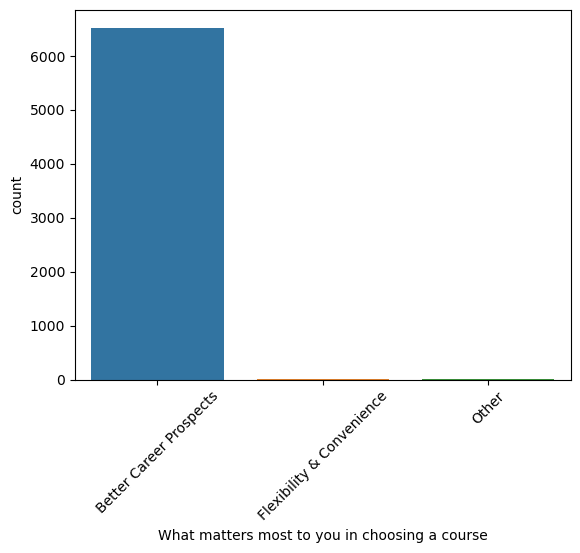

In [18]:
# Visualizing this column
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [19]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [21]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

##### 4) Column: 'What is your current occupation'
this column has 29% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

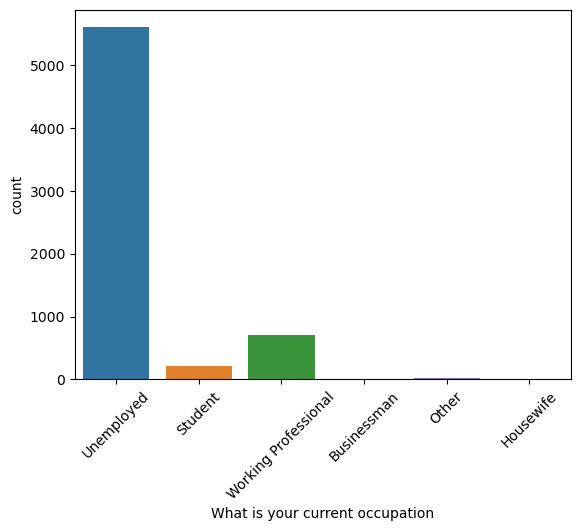

In [22]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [23]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [24]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

##### 5) Column: 'Country'¶
This column has 27% missing values



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

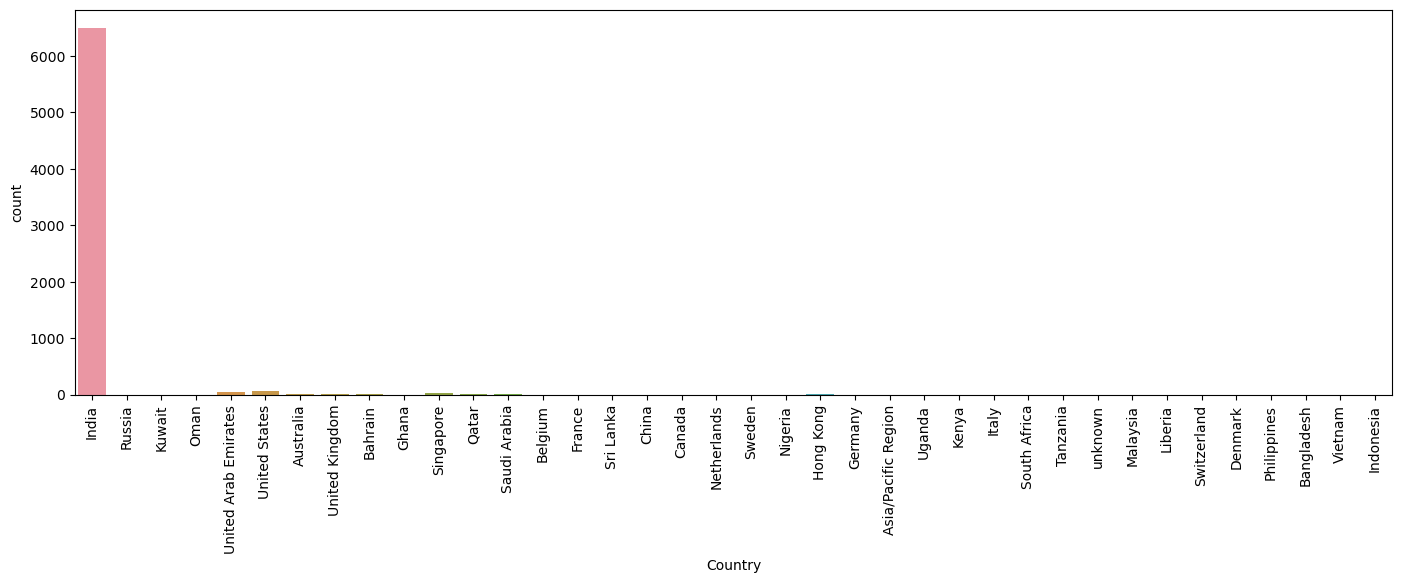

In [25]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [26]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

#### 6) Column: 'City'
This column has 40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

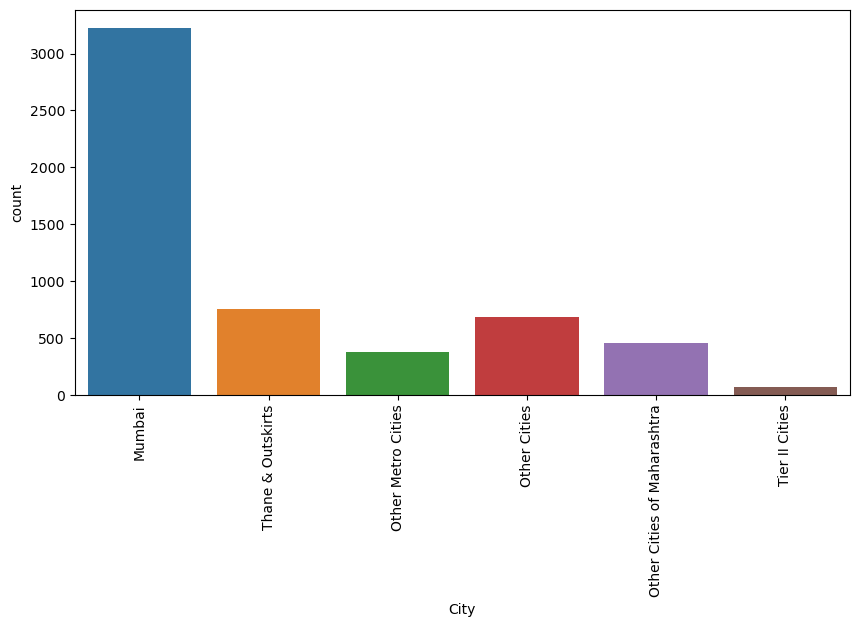

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

In [28]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100


Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [32]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [33]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Rest missing values are under 2% so we can drop these rows.


In [37]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [38]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

##### We can find the percentage of rows retained.

In [39]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

59.51298701298702

We have retained 59% of the rows after cleaning the data .
### Exploratory Data Anaysis
Checking for duplicates:

In [40]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset.

### Univariate Analysis and Bivariate Analysis
##### 1) Converted
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [41]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

41.02564102564102

The lead conversion rate is 41%.

#### 2) Lead Origin


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Landing Page Submission'),
  Text(1, 0, 'API'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

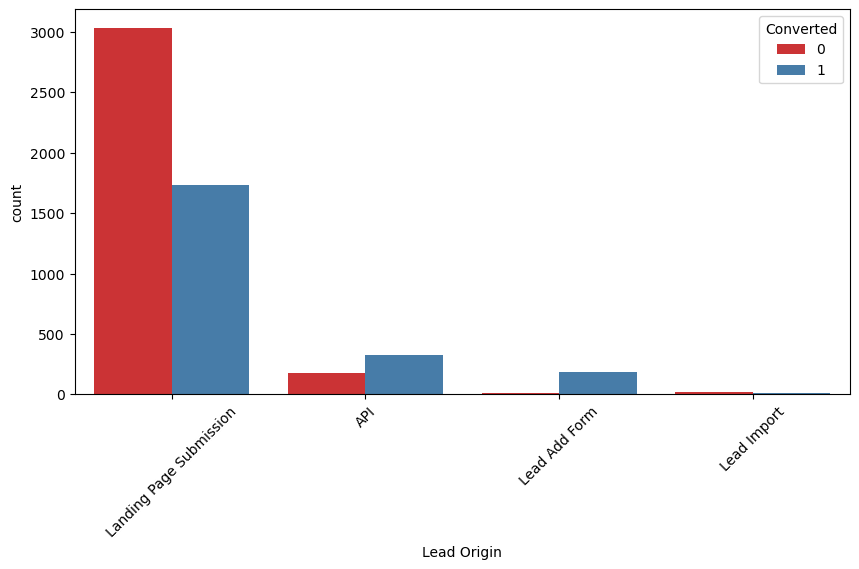

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

#### Inference :¶
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

Lead Add Form has more than 90% conversion rate but count of lead are not very high.

Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### 3) Lead Source


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Click2call'),
  Text(13, 0, 'welearnblog_Home'),
  Text(14, 0, 'testone'),
  Text(15, 0, 'Press_Release'),
  Text(16, 0, 'Social Media'),
  Text(17, 0, 'NC_EDM')])

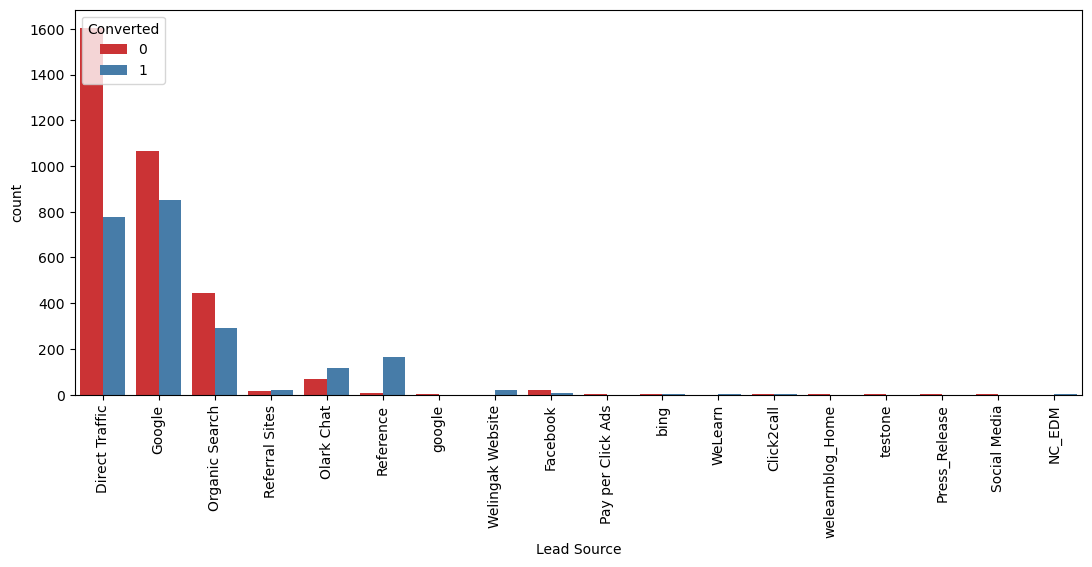

In [43]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [44]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [45]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

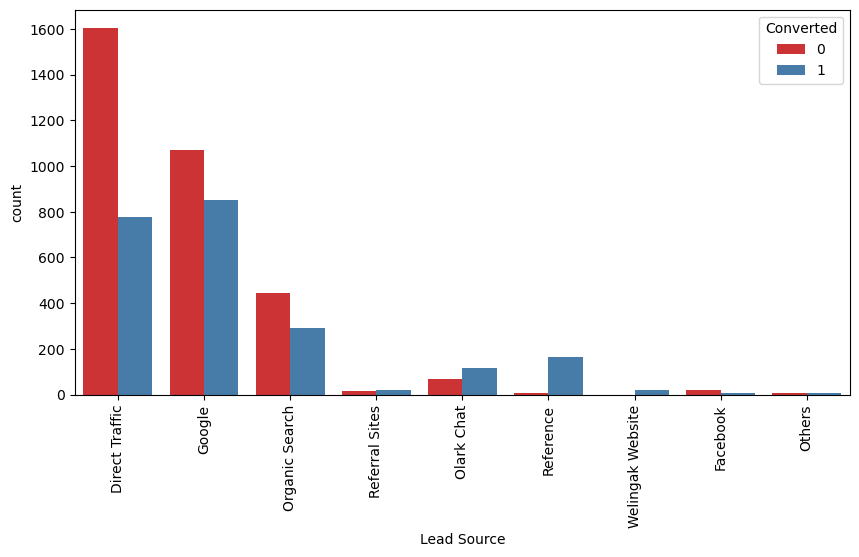

In [46]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

### Inference
Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, 
direct traffic, and google leads and generate more leads from reference and welingak website.

#### 4) Do not Emai

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

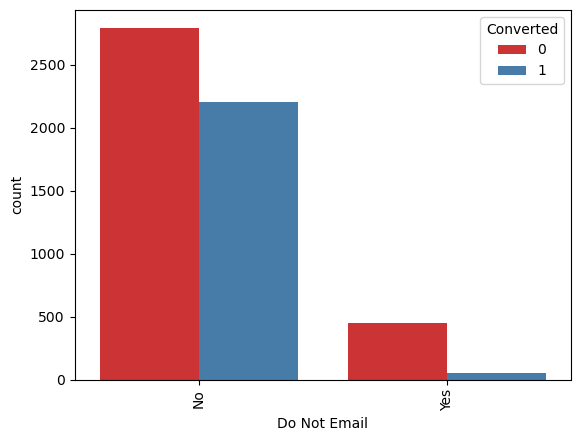

In [47]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.



#### 5) Do not call¶


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

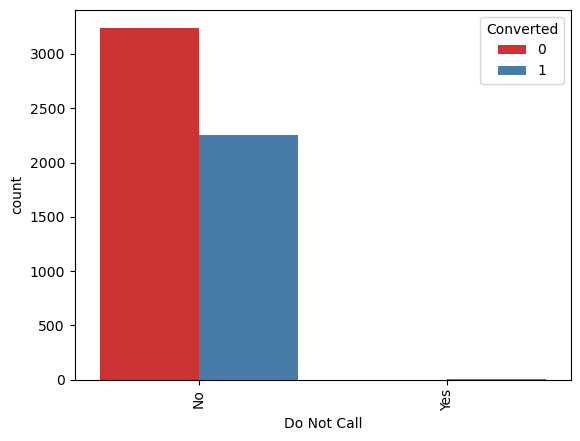

In [48]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#### 6) TotalVisits

In [49]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5499.000000
mean        4.563921
std         5.568716
min         0.000000
5%          0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

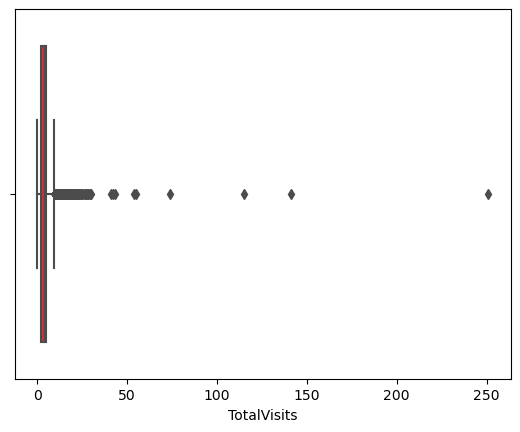

In [50]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

In [51]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

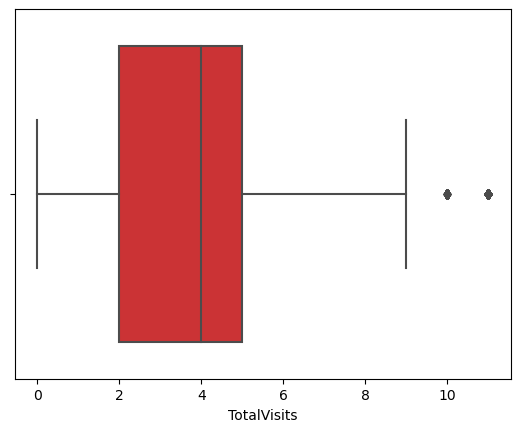

In [52]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

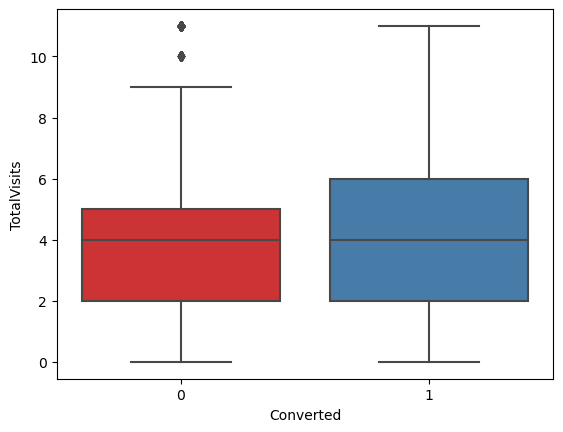

In [53]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')


#### Inference
Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.

#### 7) Total Time Spent on Website

In [54]:
lead_data['Total Time Spent on Website'].describe()


count    5499.000000
mean      614.903983
std       549.726990
min         0.000000
25%       149.000000
50%       381.000000
75%      1091.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

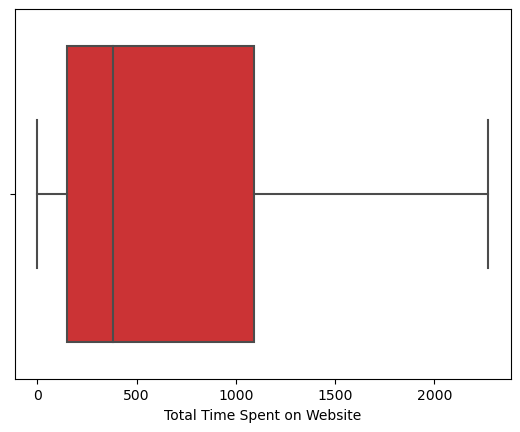

In [55]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')


<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

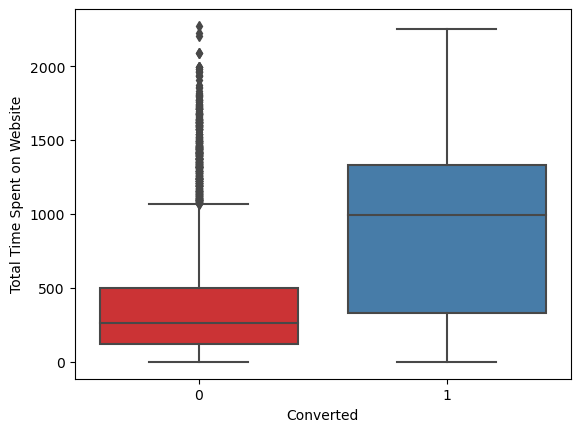

In [56]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

#### Inference
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

#### 8) Page Views Per Visit

In [57]:
lead_data['Page Views Per Visit'].describe()


count    5499.000000
mean        3.125772
std         2.062951
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

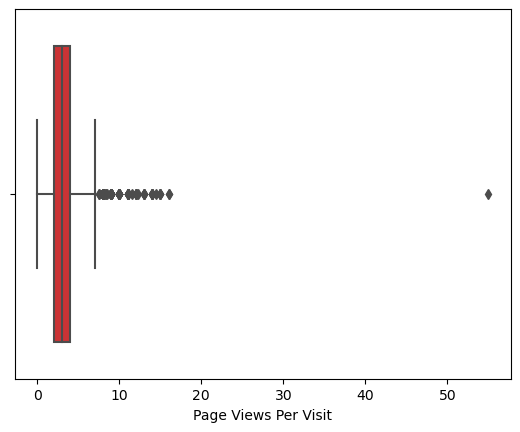

In [58]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

In [59]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

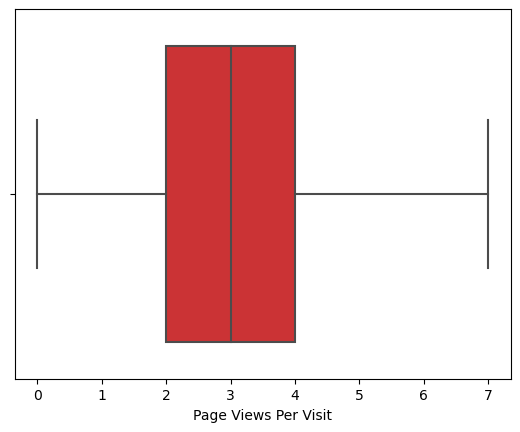

In [60]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

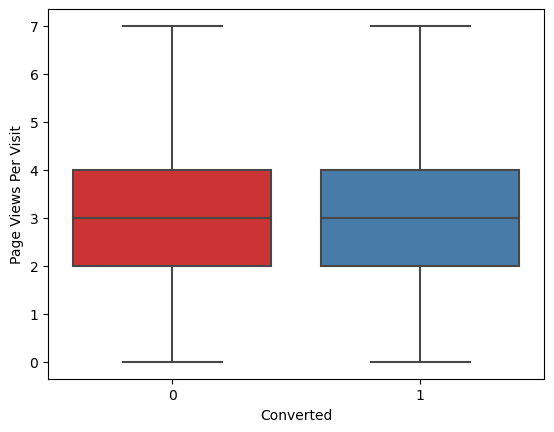

In [61]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

#### Inference
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

#### 9) Last Activity

In [62]:
lead_data['Last Activity'].describe()

count             5499
unique              16
top       Email Opened
freq              2306
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Converted to Lead'),
  Text(3, 0, 'Page Visited on Website'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'SMS Sent'),
  Text(11, 0, 'Visited Booth in Tradeshow'),
  Text(12, 0, 'Approached upfront'),
  Text(13, 0, 'View in browser link Clicked'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

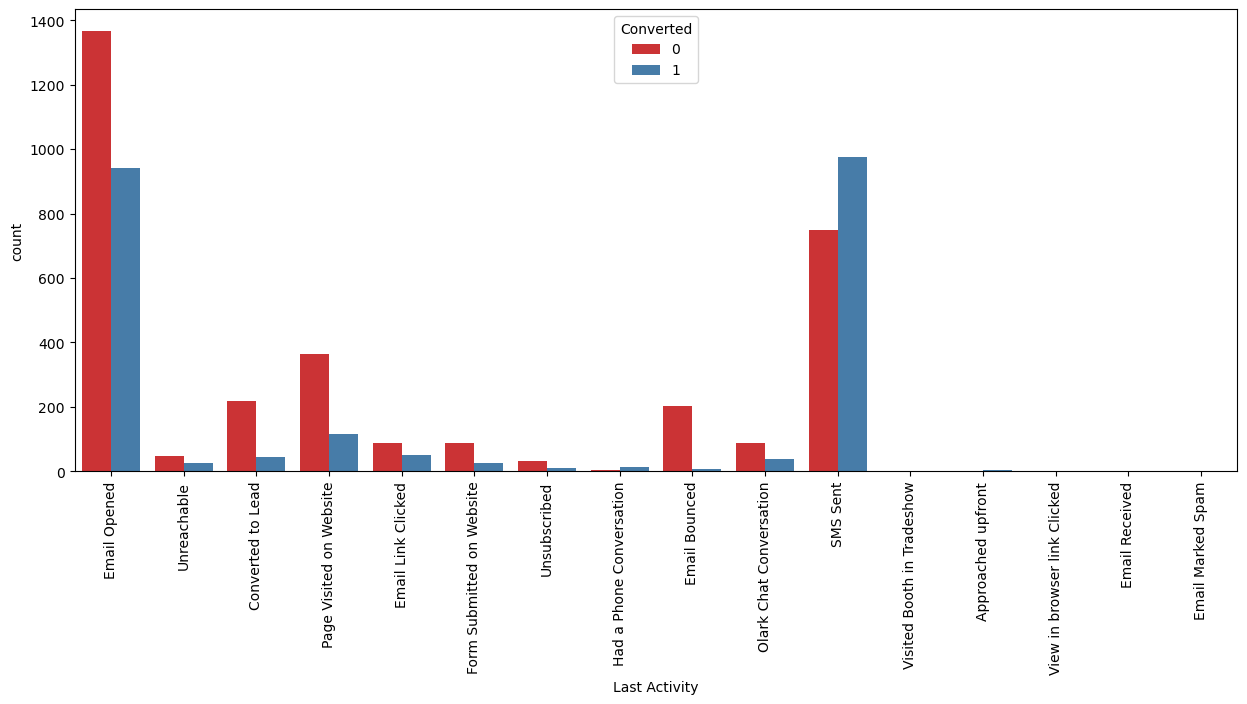

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [64]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Converted to Lead'),
  Text(3, 0, 'Page Visited on Website'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Other_Activity'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'SMS Sent')])

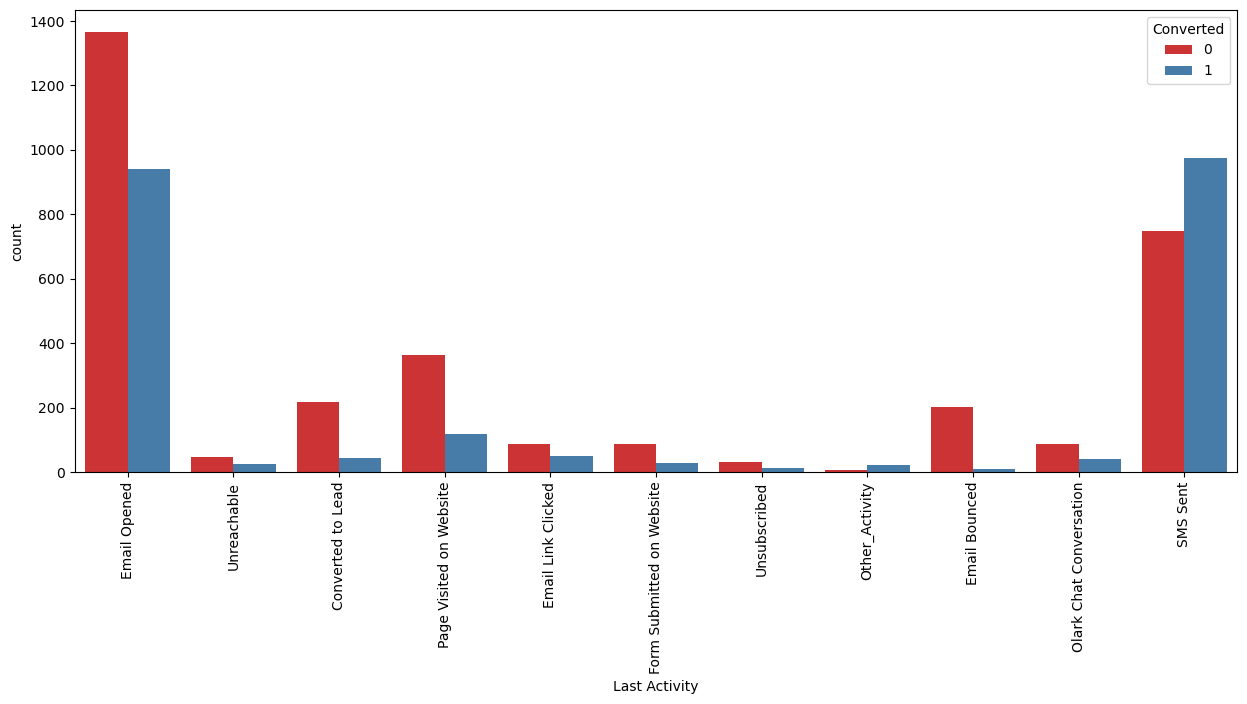

In [65]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.

#### 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Kuwait'),
  Text(2, 0, 'Oman'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Bahrain'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Saudi Arabia'),
  Text(11, 0, 'United Arab Emirates'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'France'),
  Text(14, 0, 'China'),
  Text(15, 0, 'Canada'),
  Text(16, 0, 'Netherlands'),
  Text(17, 0, 'Nigeria'),
  Text(18, 0, 'Hong Kong'),
  Text(19, 0, 'Germany'),
  Text(20, 0, 'Uganda'),
  Text(21, 0, 'Sweden'),
  Text(22, 0, 'Kenya'),
  Text(23, 0, 'South Africa'),
  Text(24, 0, 'Tanzania'),
  Text(25, 0, 'Malaysia'),
  Text(26, 0, 'Liberia'),
  Text(27, 0, 'Italy'),
  Text(28, 0, 'Switzerland'),
  Text(29, 0, 'Denmark'),
  Text(30, 0, 'Philippines'),
  Text(31, 0, 

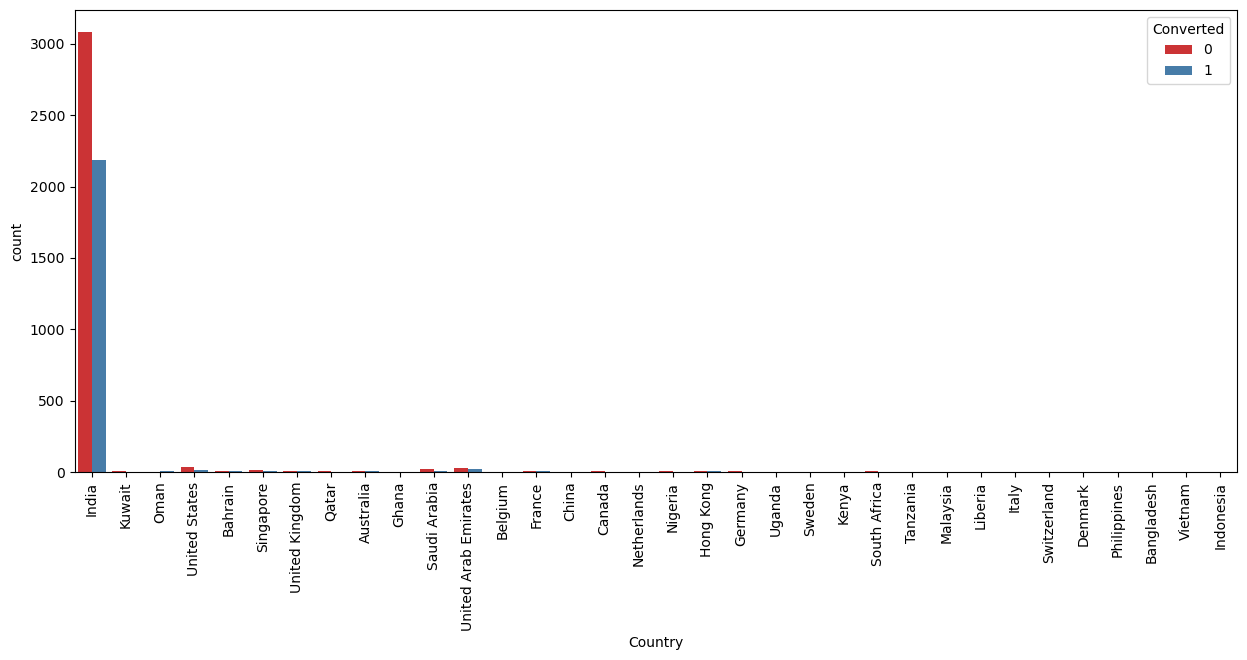

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most values are 'India' no such inference can be drawn

#### 11) Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

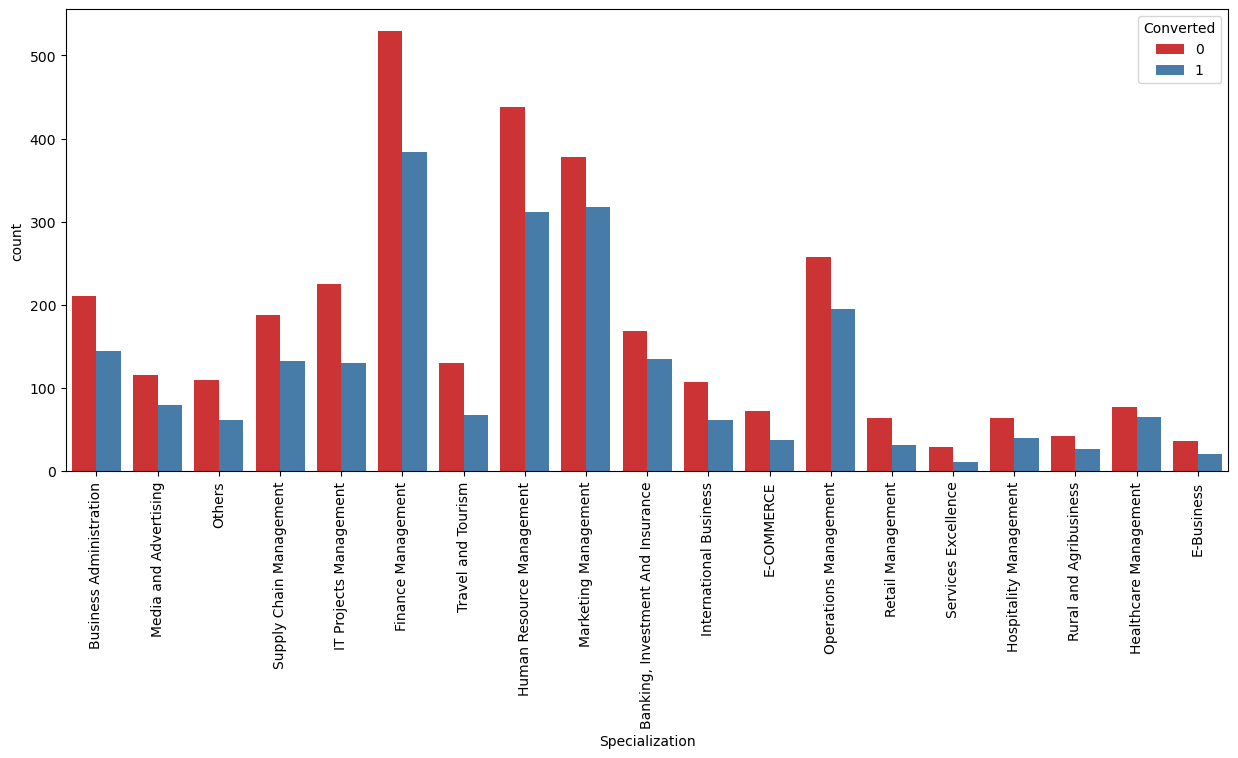

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
Focus should be more on the Specialization with high conversion rate.

#### 12) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Housewife'),
  Text(4, 0, 'Businessman'),
  Text(5, 0, 'Other')])

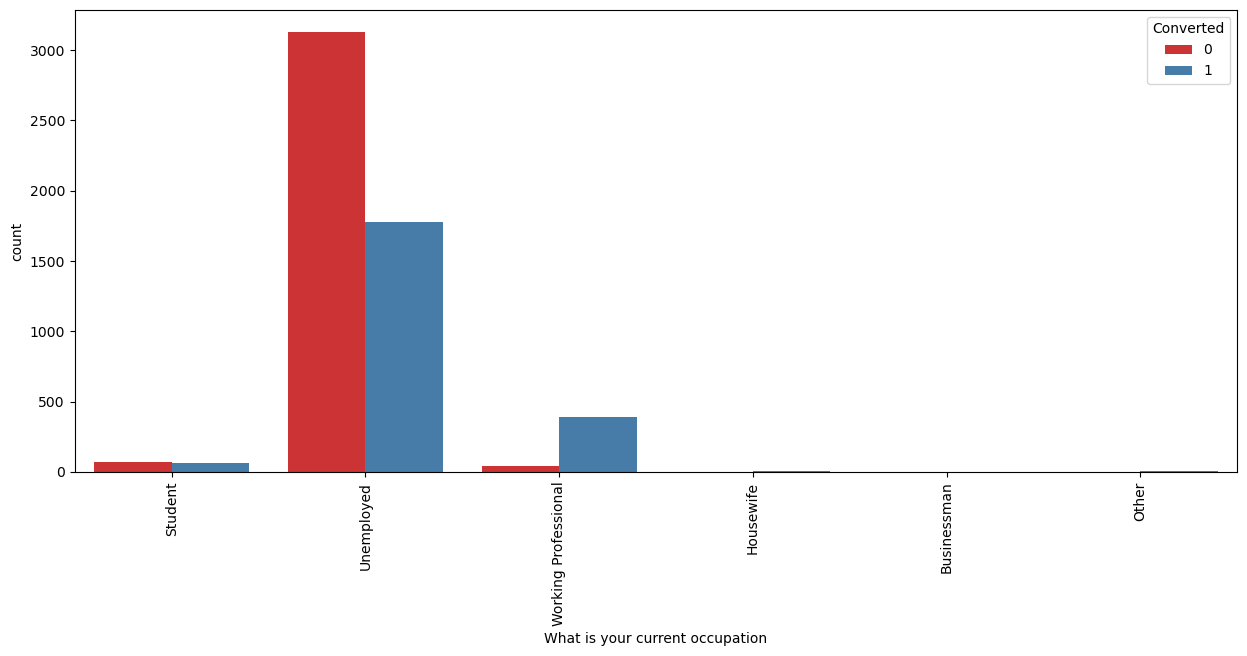

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### 13) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

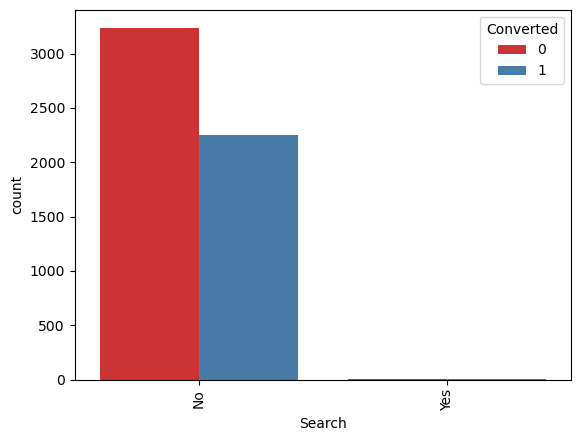

In [70]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 14) Magazine


(array([0]), [Text(0, 0, 'No')])

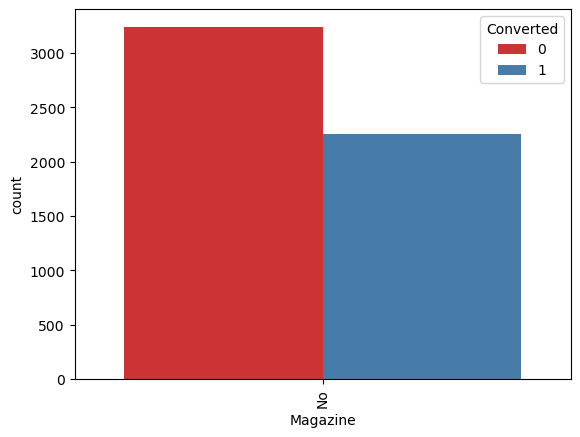

In [71]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 15) Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

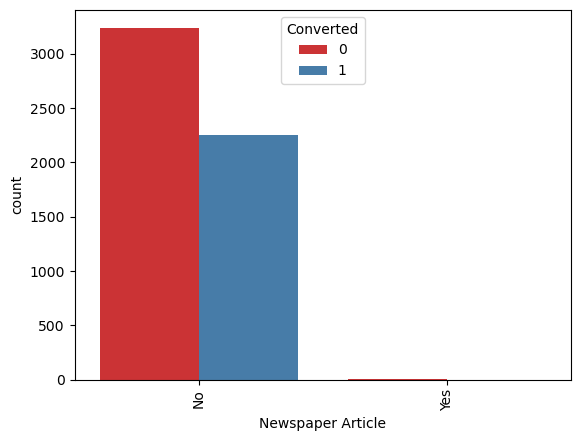

In [72]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

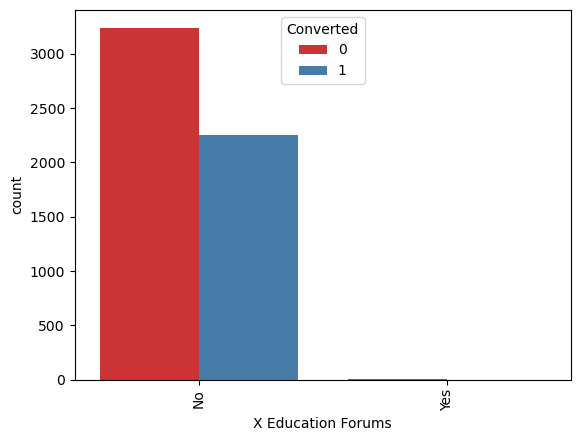

In [73]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 17) Newspaper

(array([0]), [Text(0, 0, 'No')])

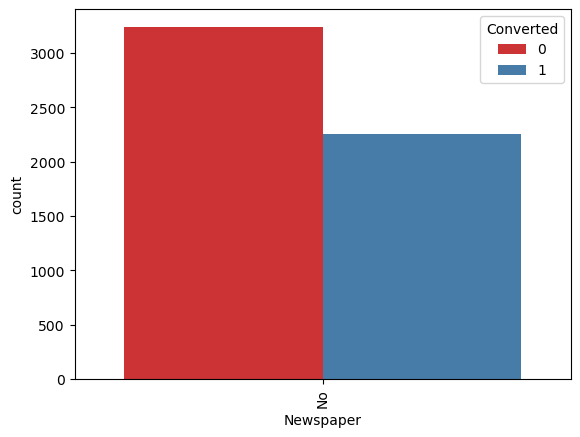

In [74]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 18) Digital Advertisement


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

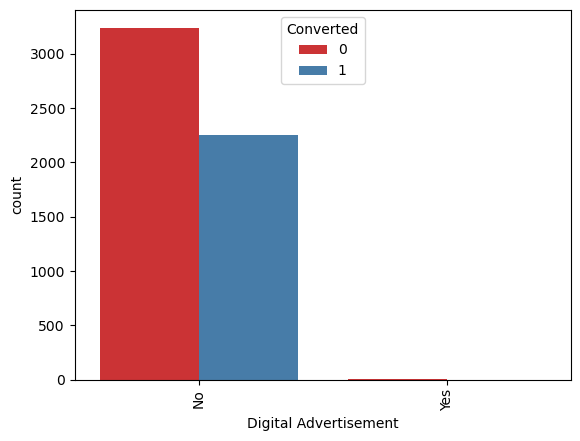

In [75]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 19) Through Recommendations


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

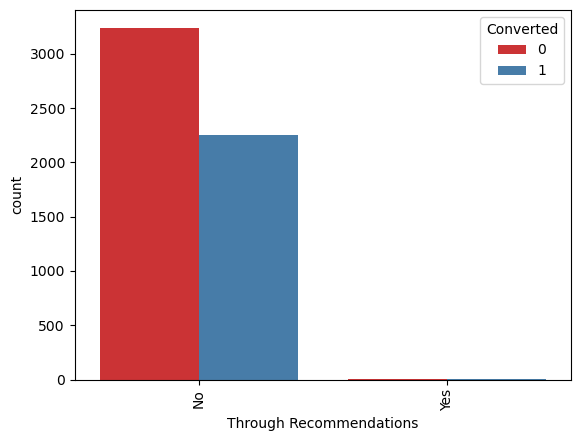

In [77]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 20) Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

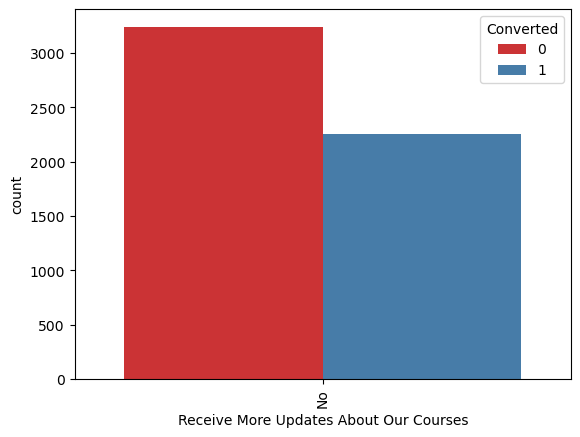

In [78]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 21) Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Will revert after reading the email'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Lost to EINS'),
  Text(3, 0, 'Interested in other courses'),
  Text(4, 0, 'Busy'),
  Text(5, 0, 'switched off'),
  Text(6, 0, 'in touch with EINS'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Diploma holder (Not Eligible)'),
  Text(9, 0, 'Graduation in progress'),
  Text(10, 0, 'number not provided'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'Not doing further education'),
  Text(13, 0, 'invalid number'),
  Text(14, 0, 'Interested  in full time MBA'),
  Text(15, 0, 'wrong number given'),
  Text(16, 0, 'opp hangup'),
  Text(17, 0, 'Still Thinking'),
  Text(18, 0, 'Lost to Others'),
  Text(19, 0, 'Shall take in the next coming month'),
  Text(20, 0, 'Interested in Next batch'),
  Text(21, 0, 'Recognition issue (DEC approval)'),
  Text(22, 0, 'Want to take admission 

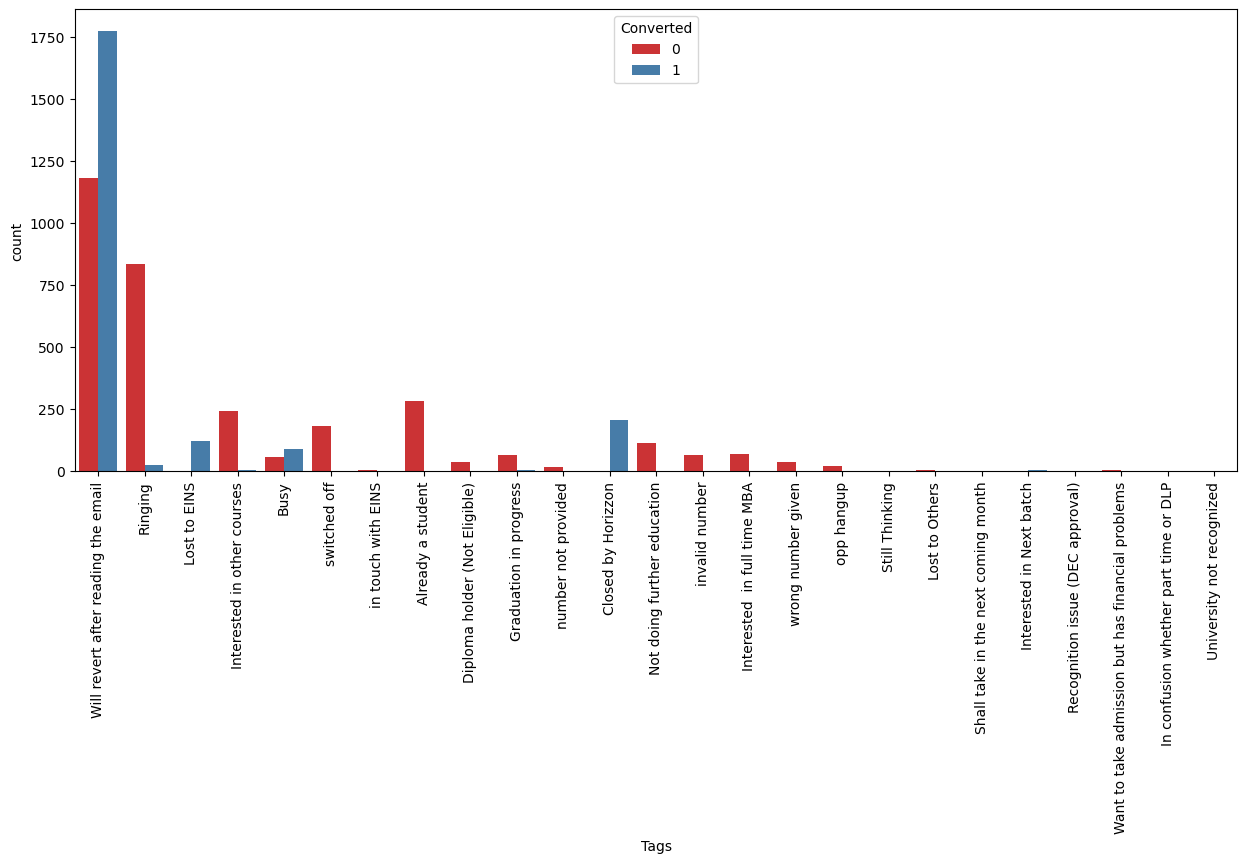

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . 

So we will need to remove this column before building the model.

#### 22) Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

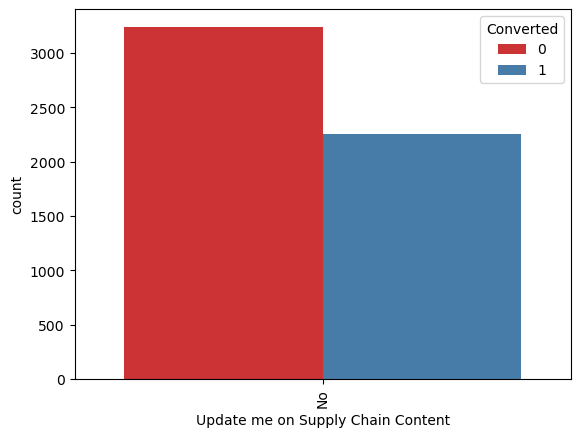

In [80]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 23) Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

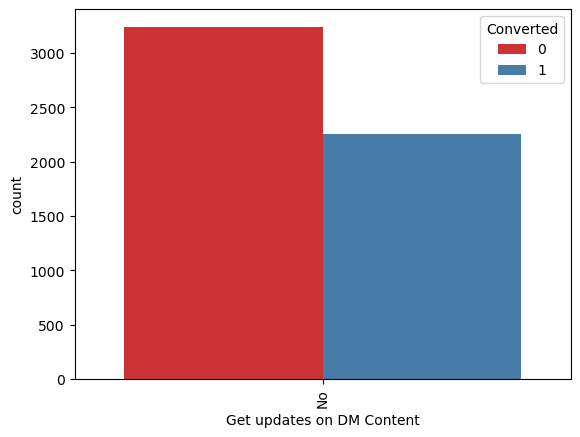

In [81]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 24) City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

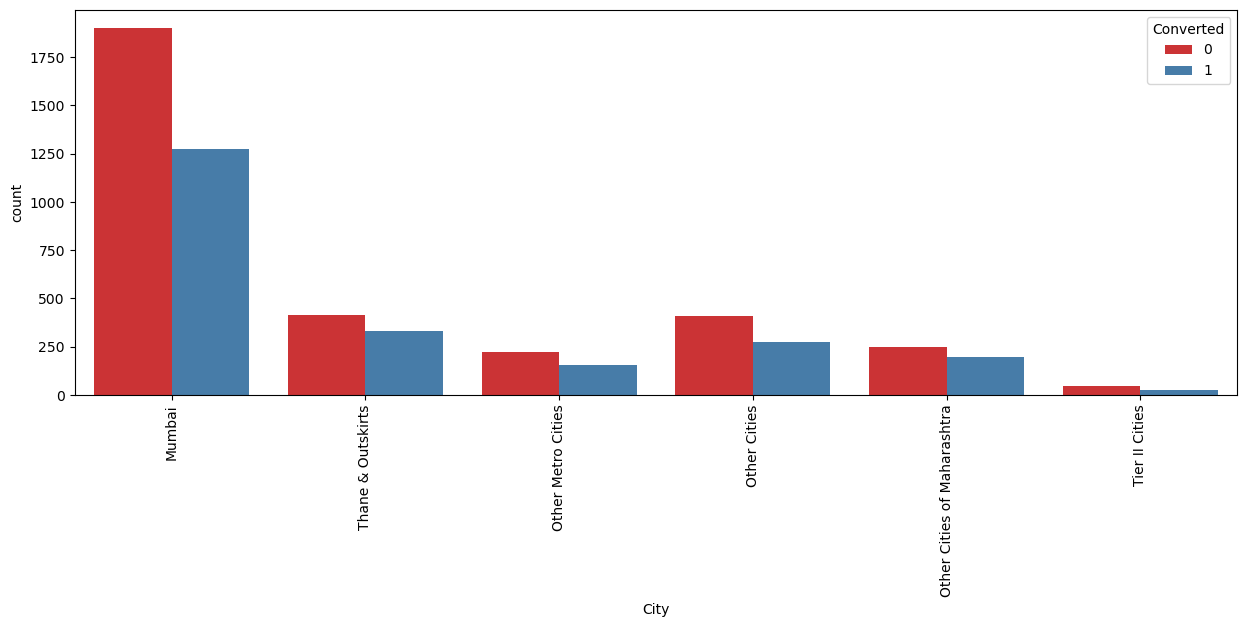

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most leads are from mumbai with around 50% conversion rate.

#### 25) I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

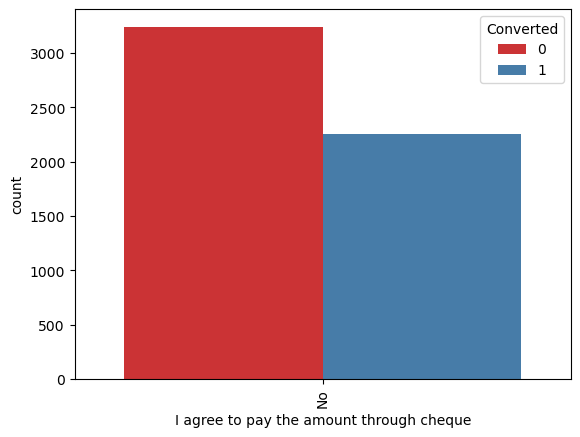

In [83]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 26) A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

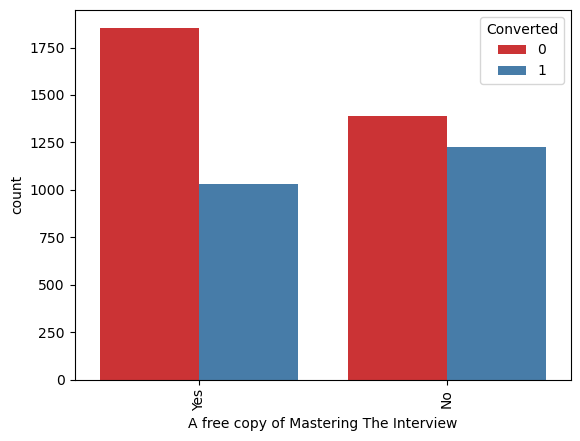

In [84]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 27) Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Modified'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Link Clicked'),
  Text(4, 0, 'Unreachable'),
  Text(5, 0, 'Unsubscribed'),
  Text(6, 0, 'Had a Phone Conversation'),
  Text(7, 0, 'Olark Chat Conversation'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Form Submitted on Website'),
  Text(13, 0, 'Email Received'),
  Text(14, 0, 'Email Marked Spam')])

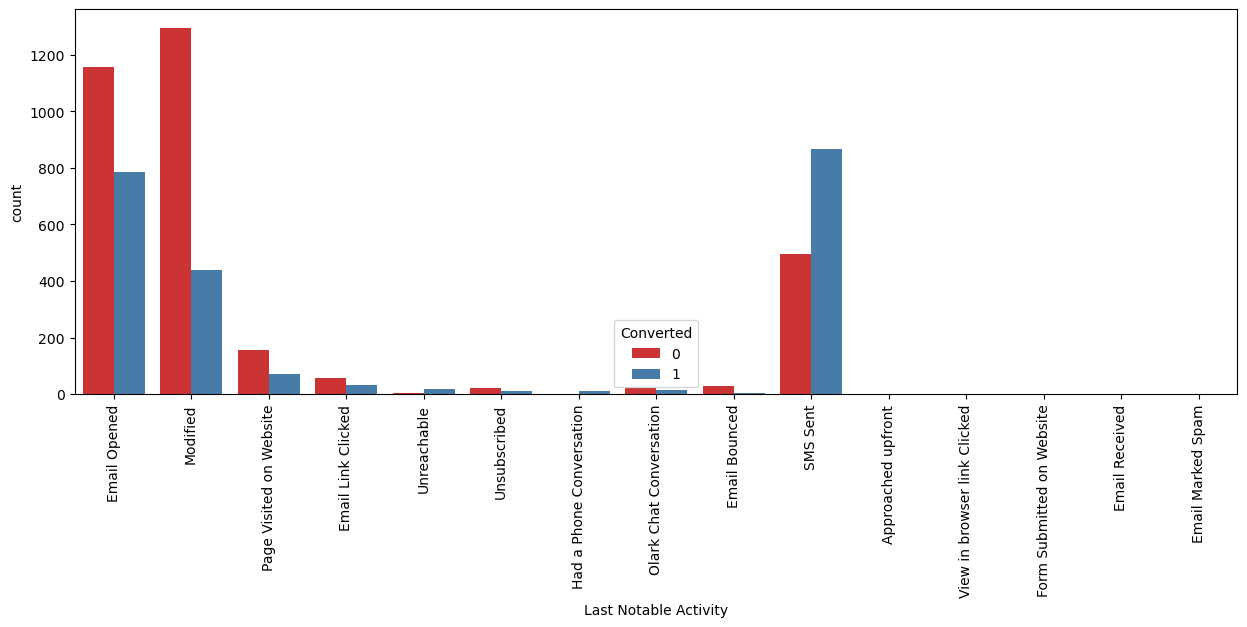

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Results

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [86]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [87]:
lead_data.shape

(5499, 14)

In [88]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5499 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      5499 non-null   object 
 1   Lead Origin                      5499 non-null   object 
 2   Lead Source                      5499 non-null   object 
 3   Do Not Email                     5499 non-null   object 
 4   Do Not Call                      5499 non-null   object 
 5   Converted                        5499 non-null   int64  
 6   TotalVisits                      5499 non-null   float64
 7   Total Time Spent on Website      5499 non-null   int64  
 8   Page Views Per Visit             5499 non-null   float64
 9   Last Activity                    5499 non-null   object 
 10  Specialization                   5499 non-null   object 
 11  What is your current occupation  5499 non-null   object 
 12  City                

### Data Preparation

#### 1) Converting some binary variables (Yes/No) to 1/0

In [89]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

#### 2) Creating Dummy variables for the categorical features:

'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [90]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,...,0,0,0,1,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


Dropping the columns for which dummies were created

In [92]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [93]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0,1,2.0,1640,2.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,0,0,2.0,71,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3) Splitting the data into train and test set.

In [95]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,0,2.0,71,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

2    1
3    0
4    1
6    1
8    0
Name: Converted, dtype: int64

In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4) Scaling the features


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6567,0,0,-1.563512,-1.112437,-1.826045,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3060,0,0,-0.086350,1.733661,0.572501,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5019,0,0,0.652231,2.471741,-0.926590,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2161,0,0,0.282940,2.052336,1.172138,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9076,0,0,-0.086350,1.821571,0.572501,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

41.02564102564102

#### Feature Selection Using RFE

In [125]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [126]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True])

In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 32),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last A

In [128]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
     

### Model Building

Assessing the model with StatsModels

#### Model-1

In [129]:
import statsmodels.api as sm

In [130]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3814
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1681.6
Date:                Tue, 06 Jun 2023   Deviance:                       3363.3
Time:                        15:31:57   Pearson chi2:                 4.10e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3775
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3537      1.395      0.971      0.332      -1.380       4.087
Do Not Email                                            -1.7116      0.268     -6.385      0.000      -2.237      -1.186
Total Time Spent on Website                              1.0514      0.046     22.898      0.000       0.961       1.141
Lead Origin_Landing Page Submission                     -1.3390      0.173     -7.749      0.000      -1.678      -1.000
Lead Origin_Lead Add Form                                1.7386      1.178      1.477      0.140      -0.569       4.046
Lead Source_Olark Chat                                   0.6580      0.267      2.463      0.014       0.134       1.182
Lead Source_Reference                                    1.6393      1.242      1.320      0.187      -0.795       4.074
Lead Source_Referral Sites                               0.5902      0.519      1.136      0.256      -0.428       1.608
Lead Source_Welingak Website                            22.0905   1.97e+04      0.001      0.999   -3.87e+04    3.87e+04
Last Activity_Email Bounced                             -1.3032      0.736     -1.770      0.077      -2.746       0.140
Last Activity_Email Link Clicked                         0.4658      0.487      0.956      0.339      -0.490       1.421
Last Activity_Email Opened                               0.7557      0.216      3.503      0.000       0.333       1.179
Last Activity_Form Submitted on Website                 -0.4862      0.368     -1.321      0.186      -1.208       0.235
Last Activity_Other_Activity                             1.4470      1.013      1.429      0.153      -0.538       3.432
Last Activity_SMS Sent                                   0.4138      0.224      1.846      0.065      -0.026       0.853
Last Activity_Unreachable                                0.1016      0.523      0.195      0.846      -0.923       1.126
Last Activity_Unsubscribed                               1.4999      1.185      1.266      0.206      -0.822       3.822
Specialization_Business Administration                  -0.2763      0.176     -1.571      0.116      -0.621       0.068
Specialization_Hospitality Management                   -0.5632      0.347     -1.623      0.105      -1.243       0.117
Specialization_Retail Management                        -0.8211      0.369     -2.223      0.026      -1.545      -0.097
Specialization_Rural and Agribusiness                    0.3138      0.361      0.870      0.384      -0.393       1.020
What is your current occupation_Housewife               22.8989   2.81e+04      0.001      0.999    -5.5e+04    5.51e+04
What is your current occupation_Other                    0

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [131]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

#### Model-2

In [132]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3815
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.9
Date:                Tue, 06 Jun 2023   Deviance:                       3365.9
Time:                        15:32:33   Pearson chi2:                 4.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7607      1.278      2.160      0.031       0.256       5.266
Do Not Email                                            -1.7108      0.268     -6.384      0.000      -2.236      -1.186
Total Time Spent on Website                              1.0508      0.046     22.890      0.000       0.961       1.141
Lead Origin_Landing Page Submission                     -1.3306      0.173     -7.702      0.000      -1.669      -0.992
Lead Origin_Lead Add Form                                1.7435      1.177      1.481      0.139      -0.564       4.051
Lead Source_Olark Chat                                   0.6514      0.267      2.435      0.015       0.127       1.176
Lead Source_Reference                                    1.6425      1.242      1.323      0.186      -0.792       4.077
Lead Source_Referral Sites                               0.5906      0.519      1.138      0.255      -0.427       1.608
Lead Source_Welingak Website                            21.0911    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.2995      0.736     -1.765      0.078      -2.742       0.143
Last Activity_Email Link Clicked                         0.4727      0.487      0.970      0.332      -0.482       1.428
Last Activity_Email Opened                               0.7667      0.215      3.558      0.000       0.344       1.189
Last Activity_Form Submitted on Website                 -0.4773      0.368     -1.297      0.195      -1.199       0.244
Last Activity_Other_Activity                             1.4516      1.013      1.434      0.152      -0.533       3.436
Last Activity_SMS Sent                                   0.4189      0.224      1.868      0.062      -0.021       0.858
Last Activity_Unreachable                                0.1065      0.523      0.204      0.839      -0.918       1.131
Last Activity_Unsubscribed                               1.5036      1.185      1.269      0.204      -0.818       3.826
Specialization_Business Administration                  -0.2708      0.175     -1.544      0.123      -0.615       0.073
Specialization_Hospitality Management                   -0.5628      0.347     -1.622      0.105      -1.243       0.117
Specialization_Retail Management                        -0.8201      0.369     -2.221      0.026      -1.544      -0.097
Specialization_Rural and Agribusiness                    0.3143      0.360      0.872      0.383      -0.392       1.021
What is your current occupation_Other                   -0.4969      1.505     -0.330      0.741      -3.447       2.453
What is your current occupation_Student                 -2

#### Model 3

In [133]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3815
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.9
Date:                Tue, 06 Jun 2023   Deviance:                       3365.9
Time:                        15:32:54   Pearson chi2:                 4.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7607      1.278      2.160      0.031       0.256       5.266
Do Not Email                                            -1.7108      0.268     -6.384      0.000      -2.236      -1.186
Total Time Spent on Website                              1.0508      0.046     22.890      0.000       0.961       1.141
Lead Origin_Landing Page Submission                     -1.3306      0.173     -7.702      0.000      -1.669      -0.992
Lead Origin_Lead Add Form                                1.7435      1.177      1.481      0.139      -0.564       4.051
Lead Source_Olark Chat                                   0.6514      0.267      2.435      0.015       0.127       1.176
Lead Source_Reference                                    1.6425      1.242      1.323      0.186      -0.792       4.077
Lead Source_Referral Sites                               0.5906      0.519      1.138      0.255      -0.427       1.608
Lead Source_Welingak Website                            21.0911    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.2995      0.736     -1.765      0.078      -2.742       0.143
Last Activity_Email Link Clicked                         0.4727      0.487      0.970      0.332      -0.482       1.428
Last Activity_Email Opened                               0.7667      0.215      3.558      0.000       0.344       1.189
Last Activity_Form Submitted on Website                 -0.4773      0.368     -1.297      0.195      -1.199       0.244
Last Activity_Other_Activity                             1.4516      1.013      1.434      0.152      -0.533       3.436
Last Activity_SMS Sent                                   0.4189      0.224      1.868      0.062      -0.021       0.858
Last Activity_Unreachable                                0.1065      0.523      0.204      0.839      -0.918       1.131
Last Activity_Unsubscribed                               1.5036      1.185      1.269      0.204      -0.818       3.826
Specialization_Business Administration                  -0.2708      0.175     -1.544      0.123      -0.615       0.073
Specialization_Hospitality Management                   -0.5628      0.347     -1.622      0.105      -1.243       0.117
Specialization_Retail Management                        -0.8201      0.369     -2.221      0.026      -1.544      -0.097
Specialization_Rural and Agribusiness                    0.3143      0.360      0.872      0.383      -0.392       1.021
What is your current occupation_Other                   -0.4969      1.505     -0.330      0.741      -3.447       2.453
What is your current occupation_Student                 -2

In [134]:
col1 = col1.drop('What is your current occupation_Student')

#### Model-4


In [135]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3816
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1684.8
Date:                Tue, 06 Jun 2023   Deviance:                       3369.7
Time:                        15:33:18   Pearson chi2:                 4.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3764
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8314      0.579      1.435      0.151      -0.304       1.967
Do Not Email                                            -1.7110      0.268     -6.388      0.000      -2.236      -1.186
Total Time Spent on Website                              1.0493      0.046     22.882      0.000       0.959       1.139
Lead Origin_Landing Page Submission                     -1.3428      0.172     -7.791      0.000      -1.681      -1.005
Lead Origin_Lead Add Form                                1.7300      1.177      1.470      0.142      -0.577       4.037
Lead Source_Olark Chat                                   0.6553      0.267      2.454      0.014       0.132       1.179
Lead Source_Reference                                    1.6452      1.242      1.325      0.185      -0.789       4.079
Lead Source_Referral Sites                               0.5886      0.519      1.133      0.257      -0.429       1.607
Lead Source_Welingak Website                            21.0919    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.3117      0.735     -1.784      0.074      -2.753       0.130
Last Activity_Email Link Clicked                         0.4631      0.487      0.951      0.342      -0.491       1.417
Last Activity_Email Opened                               0.7710      0.215      3.589      0.000       0.350       1.192
Last Activity_Form Submitted on Website                 -0.4847      0.368     -1.317      0.188      -1.206       0.236
Last Activity_Other_Activity                             1.4513      1.012      1.434      0.152      -0.533       3.435
Last Activity_SMS Sent                                   0.4145      0.224      1.850      0.064      -0.025       0.854
Last Activity_Unreachable                                0.1059      0.522      0.203      0.839      -0.918       1.130
Last Activity_Unsubscribed                               1.4853      1.182      1.257      0.209      -0.831       3.802
Specialization_Business Administration                  -0.2589      0.175     -1.480      0.139      -0.602       0.084
Specialization_Hospitality Management                   -0.5667      0.347     -1.635      0.102      -1.246       0.113
Specialization_Retail Management                        -0.8235      0.370     -2.227      0.026      -1.548      -0.099
Specialization_Rural and Agribusiness                    0.3053      0.360      0.847      0.397      -0.401       1.012
What is your current occupation_Other                    1.4337      0.984      1.457      0.145      -0.495       3.363
What is your current occupation_Unemployed              -0

In [136]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model-5


In [137]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3817
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.1
Date:                Tue, 06 Jun 2023   Deviance:                       3372.3
Time:                        15:33:51   Pearson chi2:                 4.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3760
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8638      0.579      1.492      0.136      -0.271       1.998
Do Not Email                                            -1.7134      0.268     -6.393      0.000      -2.239      -1.188
Total Time Spent on Website                              1.0472      0.046     22.859      0.000       0.957       1.137
Lead Origin_Landing Page Submission                     -1.3851      0.171     -8.117      0.000      -1.719      -1.051
Lead Source_Olark Chat                                   0.6113      0.266      2.301      0.021       0.091       1.132
Lead Source_Reference                                    3.3298      0.462      7.210      0.000       2.425       4.235
Lead Source_Referral Sites                               0.5764      0.520      1.108      0.268      -0.443       1.596
Lead Source_Welingak Website                            22.7756    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.3053      0.735     -1.775      0.076      -2.747       0.136
Last Activity_Email Link Clicked                         0.4624      0.487      0.950      0.342      -0.492       1.417
Last Activity_Email Opened                               0.7809      0.215      3.637      0.000       0.360       1.202
Last Activity_Form Submitted on Website                 -0.4918      0.368     -1.337      0.181      -1.213       0.229
Last Activity_Other_Activity                             1.4549      1.012      1.438      0.150      -0.528       3.438
Last Activity_SMS Sent                                   0.4158      0.224      1.856      0.064      -0.023       0.855
Last Activity_Unreachable                                0.1076      0.522      0.206      0.837      -0.916       1.131
Last Activity_Unsubscribed                               1.4902      1.182      1.261      0.207      -0.826       3.806
Specialization_Business Administration                  -0.2605      0.175     -1.490      0.136      -0.603       0.082
Specialization_Hospitality Management                   -0.5674      0.347     -1.636      0.102      -1.247       0.112
Specialization_Retail Management                        -0.8238      0.370     -2.227      0.026      -1.549      -0.099
Specialization_Rural and Agribusiness                    0.3014      0.361      0.836      0.403      -0.405       1.008
What is your current occupation_Other                    1.4366      0.985      1.459      0.145      -0.493       3.366
What is your current occupation_Unemployed              -0.5357      0.273     -1.960      0.050      -1.071   -2.25e-05
What is your current occupation_Working Professional     2

Checking for VIF values:


In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,What is your current occupation_Unemployed,26.04
23,Last Notable Activity_Email Opened,20.15
27,Last Notable Activity_SMS Sent,14.49
2,Lead Origin_Landing Page Submission,14.04
25,Last Notable Activity_Modified,12.37
9,Last Activity_Email Opened,10.14
12,Last Activity_SMS Sent,7.51
22,Last Notable Activity_Email Link Clicked,3.42
29,Last Notable Activity_Unsubscribed,3.33
14,Last Activity_Unsubscribed,3.28


In [139]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

#### Model-6


In [140]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3818
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.0
Date:                Tue, 06 Jun 2023   Deviance:                       3376.1
Time:                        15:34:38   Pearson chi2:                 4.12e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3406      0.509      0.669      0.503      -0.657       1.338
Do Not Email                                            -1.7192      0.268     -6.405      0.000      -2.245      -1.193
Total Time Spent on Website                              1.0475      0.046     22.879      0.000       0.958       1.137
Lead Origin_Landing Page Submission                     -1.3803      0.171     -8.092      0.000      -1.715      -1.046
Lead Source_Olark Chat                                   0.6154      0.266      2.316      0.021       0.095       1.136
Lead Source_Reference                                    3.3861      0.461      7.347      0.000       2.483       4.289
Lead Source_Referral Sites                               0.5632      0.520      1.083      0.279      -0.456       1.582
Lead Source_Welingak Website                            22.7658    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.2780      0.737     -1.733      0.083      -2.723       0.167
Last Activity_Email Link Clicked                         0.4585      0.489      0.938      0.348      -0.499       1.416
Last Activity_Email Opened                               0.7759      0.215      3.609      0.000       0.355       1.197
Last Activity_Form Submitted on Website                 -0.5115      0.368     -1.390      0.164      -1.233       0.210
Last Activity_Other_Activity                             1.4349      1.011      1.419      0.156      -0.547       3.417
Last Activity_SMS Sent                                   0.4025      0.224      1.798      0.072      -0.036       0.841
Last Activity_Unreachable                                0.0823      0.523      0.157      0.875      -0.943       1.107
Last Activity_Unsubscribed                               1.5240      1.190      1.281      0.200      -0.808       3.856
Specialization_Business Administration                  -0.2652      0.175     -1.518      0.129      -0.608       0.077
Specialization_Hospitality Management                   -0.5635      0.348     -1.621      0.105      -1.245       0.118
Specialization_Retail Management                        -0.8193      0.368     -2.225      0.026      -1.541      -0.097
Specialization_Rural and Agribusiness                    0.3211      0.361      0.890      0.373      -0.386       1.028
What is your current occupation_Other                    1.9558      0.948      2.062      0.039       0.097       3.815
What is your current occupation_Working Professional     2.9323      0.240     12.208      0.000       2.462       3.403
Last Notable Activity_Email Link Clicked                -0

In [ ]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

#### Model-7


In [143]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3818
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.0
Date:                Tue, 06 Jun 2023   Deviance:                       3376.1
Time:                        15:35:36   Pearson chi2:                 4.12e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3406      0.509      0.669      0.503      -0.657       1.338
Do Not Email                                            -1.7192      0.268     -6.405      0.000      -2.245      -1.193
Total Time Spent on Website                              1.0475      0.046     22.879      0.000       0.958       1.137
Lead Origin_Landing Page Submission                     -1.3803      0.171     -8.092      0.000      -1.715      -1.046
Lead Source_Olark Chat                                   0.6154      0.266      2.316      0.021       0.095       1.136
Lead Source_Reference                                    3.3861      0.461      7.347      0.000       2.483       4.289
Lead Source_Referral Sites                               0.5632      0.520      1.083      0.279      -0.456       1.582
Lead Source_Welingak Website                            22.7658    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.2780      0.737     -1.733      0.083      -2.723       0.167
Last Activity_Email Link Clicked                         0.4585      0.489      0.938      0.348      -0.499       1.416
Last Activity_Email Opened                               0.7759      0.215      3.609      0.000       0.355       1.197
Last Activity_Form Submitted on Website                 -0.5115      0.368     -1.390      0.164      -1.233       0.210
Last Activity_Other_Activity                             1.4349      1.011      1.419      0.156      -0.547       3.417
Last Activity_SMS Sent                                   0.4025      0.224      1.798      0.072      -0.036       0.841
Last Activity_Unreachable                                0.0823      0.523      0.157      0.875      -0.943       1.107
Last Activity_Unsubscribed                               1.5240      1.190      1.281      0.200      -0.808       3.856
Specialization_Business Administration                  -0.2652      0.175     -1.518      0.129      -0.608       0.077
Specialization_Hospitality Management                   -0.5635      0.348     -1.621      0.105      -1.245       0.118
Specialization_Retail Management                        -0.8193      0.368     -2.225      0.026      -1.541      -0.097
Specialization_Rural and Agribusiness                    0.3211      0.361      0.890      0.373      -0.386       1.028
What is your current occupation_Other                    1.9558      0.948      2.062      0.039       0.097       3.815
What is your current occupation_Working Professional     2.9323      0.240     12.208      0.000       2.462       3.403
Last Notable Activity_Email Link Clicked                -0

Checking for VIF values:

In [144]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Last Notable Activity_Email Opened,13.87
2,Lead Origin_Landing Page Submission,13.49
26,Last Notable Activity_SMS Sent,10.17
9,Last Activity_Email Opened,10.12
12,Last Activity_SMS Sent,7.48
24,Last Notable Activity_Modified,6.70
14,Last Activity_Unsubscribed,3.27
28,Last Notable Activity_Unsubscribed,3.23
21,Last Notable Activity_Email Link Clicked,3.13
8,Last Activity_Email Link Clicked,2.99


In [145]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model-8

In [146]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3819
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.7
Date:                Tue, 06 Jun 2023   Deviance:                       3377.3
Time:                        15:36:37   Pearson chi2:                 4.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3752
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3394      0.509      0.667      0.505      -0.658       1.337
Do Not Email                                            -1.6834      0.266     -6.332      0.000      -2.205      -1.162
Total Time Spent on Website                              1.0468      0.046     22.870      0.000       0.957       1.137
Lead Origin_Landing Page Submission                     -1.3776      0.171     -8.079      0.000      -1.712      -1.043
Lead Source_Olark Chat                                   0.6157      0.266      2.318      0.020       0.095       1.136
Lead Source_Reference                                    3.3872      0.461      7.350      0.000       2.484       4.290
Lead Source_Referral Sites                               0.5624      0.520      1.083      0.279      -0.456       1.581
Lead Source_Welingak Website                            22.7681    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.3170      0.735     -1.791      0.073      -2.758       0.124
Last Activity_Email Link Clicked                         0.4452      0.488      0.912      0.362      -0.512       1.402
Last Activity_Email Opened                               0.7626      0.214      3.556      0.000       0.342       1.183
Last Activity_Form Submitted on Website                 -0.5239      0.368     -1.425      0.154      -1.244       0.197
Last Activity_Other_Activity                             1.4201      1.010      1.406      0.160      -0.560       3.400
Last Activity_SMS Sent                                   0.3876      0.223      1.736      0.083      -0.050       0.825
Last Activity_Unreachable                                0.0670      0.523      0.128      0.898      -0.957       1.091
Specialization_Business Administration                  -0.2664      0.175     -1.525      0.127      -0.609       0.076
Specialization_Hospitality Management                   -0.5644      0.347     -1.625      0.104      -1.245       0.116
Specialization_Retail Management                        -0.8200      0.368     -2.228      0.026      -1.541      -0.099
Specialization_Rural and Agribusiness                    0.3245      0.361      0.898      0.369      -0.383       1.032
What is your current occupation_Other                    1.9423      0.948      2.050      0.040       0.085       3.800
What is your current occupation_Working Professional     2.9296      0.240     12.203      0.000       2.459       3.400
Last Notable Activity_Email Link Clicked                -0.8176      0.767     -1.065      0.287      -2.322       0.686
Last Notable Activity_Email Opened                      -0

Checking for VIF values:

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Last Notable Activity_Email Opened,13.85
2,Lead Origin_Landing Page Submission,13.49
25,Last Notable Activity_SMS Sent,10.15
9,Last Activity_Email Opened,10.08
12,Last Activity_SMS Sent,7.43
23,Last Notable Activity_Modified,6.68
20,Last Notable Activity_Email Link Clicked,3.13
8,Last Activity_Email Link Clicked,2.99
0,Do Not Email,2.00
11,Last Activity_Other_Activity,1.91


In [148]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model-9

In [149]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3820
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.9
Date:                Tue, 06 Jun 2023   Deviance:                       3381.8
Time:                        15:37:17   Pearson chi2:                 4.13e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3745
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8691      0.433      2.006      0.045       0.020       1.718
Do Not Email                                            -1.6862      0.266     -6.337      0.000      -2.208      -1.165
Total Time Spent on Website                              1.0454      0.046     22.851      0.000       0.956       1.135
Lead Origin_Landing Page Submission                     -1.3763      0.170     -8.090      0.000      -1.710      -1.043
Lead Source_Olark Chat                                   0.6190      0.266      2.331      0.020       0.099       1.140
Lead Source_Reference                                    3.3744      0.460      7.341      0.000       2.473       4.275
Lead Source_Referral Sites                               0.5777      0.512      1.128      0.259      -0.426       1.581
Lead Source_Welingak Website                            22.7678    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.5031      0.735     -2.046      0.041      -2.943      -0.063
Last Activity_Email Link Clicked                         0.4843      0.488      0.992      0.321      -0.472       1.441
Last Activity_Email Opened                               0.8020      0.214      3.743      0.000       0.382       1.222
Last Activity_Form Submitted on Website                 -0.4854      0.367     -1.321      0.186      -1.206       0.235
Last Activity_Other_Activity                             1.4475      1.015      1.426      0.154      -0.543       3.438
Last Activity_SMS Sent                                   0.4272      0.223      1.915      0.055      -0.010       0.864
Last Activity_Unreachable                                0.6180      0.406      1.524      0.127      -0.177       1.413
Specialization_Business Administration                  -0.2702      0.175     -1.547      0.122      -0.613       0.072
Specialization_Hospitality Management                   -0.5660      0.347     -1.632      0.103      -1.246       0.114
Specialization_Retail Management                        -0.8083      0.370     -2.184      0.029      -1.534      -0.083
Specialization_Rural and Agribusiness                    0.3026      0.361      0.839      0.402      -0.405       1.010
What is your current occupation_Other                    1.9603      0.949      2.065      0.039       0.100       3.821
What is your current occupation_Working Professional     2.9365      0.240     12.245      0.000       2.466       3.407
Last Notable Activity_Email Link Clicked                -1.3867      0.712     -1.947      0.052      -2.782       0.009
Last Notable Activity_Email Opened                      -1

Checking for VIF values:

In [150]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Last Notable Activity_Email Opened,13.47
2,Lead Origin_Landing Page Submission,13.13
9,Last Activity_Email Opened,10.00
25,Last Notable Activity_SMS Sent,9.87
12,Last Activity_SMS Sent,7.38
23,Last Notable Activity_Modified,6.34
20,Last Notable Activity_Email Link Clicked,3.11
8,Last Activity_Email Link Clicked,2.98
0,Do Not Email,2.00
11,Last Activity_Other_Activity,1.91


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

###### Making Prediction on the Train set


In [151]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6567    0.932129
3060    0.886135
5019    0.996859
2161    0.915677
9076    0.978905
8705    0.198964
8197    0.813029
2561    0.168716
4868    0.972089
2867    0.168311
dtype: float64

In [152]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93212899, 0.88613526, 0.99685856, 0.91567662, 0.97890539,
       0.19896387, 0.8130286 , 0.16871604, 0.97208946, 0.16831056])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.932129,6567
1,1,0.886135,3060
2,1,0.996859,5019
3,1,0.915677,2161
4,1,0.978905,9076


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [156]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.932129,6567,1
1,1,0.886135,3060,1
2,1,0.996859,5019,1
3,1,0.915677,2161,1
4,1,0.978905,9076,1


#### Making the Confusion matrix

In [157]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2007  294]
 [ 491 1057]]


In [161]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [160]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7960509223174851


Metrics beyond simply accuracy

In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6828165374677002


In [164]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))


Specificity :  0.8722294654498044


In [165]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.12777053455019557


In [166]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7823834196891192


In [167]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8034427542033626


We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [168]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

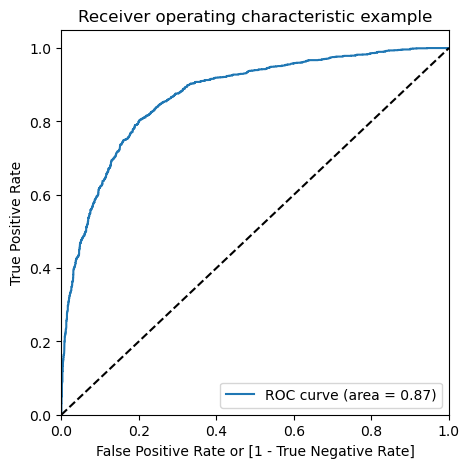

In [170]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

#### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [171]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.932129,6567,1,1,1,1,1,1,1,1,1,1,1
1,1,0.886135,3060,1,1,1,1,1,1,1,1,1,1,0
2,1,0.996859,5019,1,1,1,1,1,1,1,1,1,1,1
3,1,0.915677,2161,1,1,1,1,1,1,1,1,1,1,1
4,1,0.978905,9076,1,1,1,1,1,1,1,1,1,1,1


In [172]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.402182  1.000000  0.000000
0.1   0.1  0.555209  0.978682  0.270317
0.2   0.2  0.738374  0.912791  0.621034
0.3   0.3  0.773188  0.872739  0.706215
0.4   0.4  0.801507  0.789406  0.809648
0.5   0.5  0.796051  0.682817  0.872229
0.6   0.6  0.782281  0.593023  0.909605
0.7   0.7  0.760717  0.496770  0.938288
0.8   0.8  0.731099  0.376615  0.969578
0.9   0.9  0.689270  0.246124  0.987397


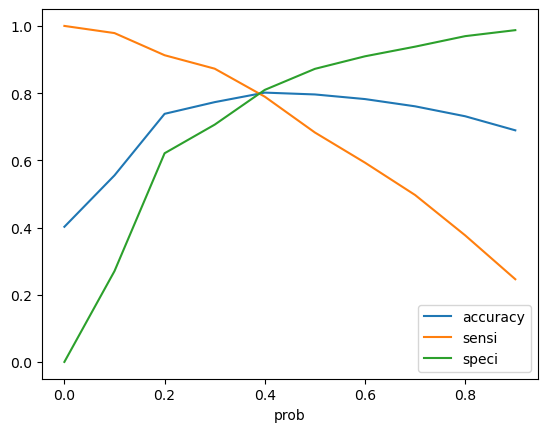

In [173]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [174]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.932129,6567,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.886135,3060,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.996859,5019,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.915677,2161,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.978905,9076,1,1,1,1,1,1,1,1,1,1,1,1


Assigning Lead Score to the Training data

In [175]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.932129,6567,1,1,1,1,1,1,1,1,1,1,1,1,93
1,1,0.886135,3060,1,1,1,1,1,1,1,1,1,1,0,1,89
2,1,0.996859,5019,1,1,1,1,1,1,1,1,1,1,1,1,100
3,1,0.915677,2161,1,1,1,1,1,1,1,1,1,1,1,1,92
4,1,0.978905,9076,1,1,1,1,1,1,1,1,1,1,1,1,98


#### Model Evaluation

In [176]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7879968823070927


In [177]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1733,  568],
       [ 248, 1300]])

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8397932816537468


In [180]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7531508039982616


In [181]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.24684919600173838


In [182]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.69593147751606


In [183]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8748107016658253


#### Precision and Recall


Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.


In [184]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2007,  294],
       [ 491, 1057]])

In [185]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7823834196891192


In [186]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6828165374677002


In [187]:
from sklearn.metrics import precision_score, recall_score

In [188]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7823834196891192


In [189]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6828165374677002


Precision and recall tradeoff¶

In [190]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       1
 4       1
        ..
 3844    0
 3845    1
 3846    1
 3847    0
 3848    0
 Name: Converted, Length: 3849, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 3844    0
 3845    1
 3846    0
 3847    0
 3848    0
 Name: predicted, Length: 3849, dtype: int64)

In [191]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

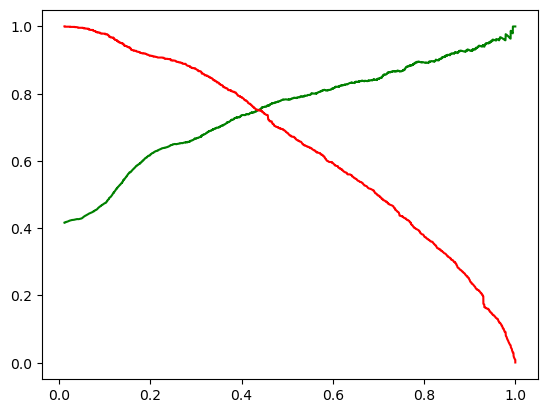

In [192]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .

### Making predictions on the test set
Scaling the test data

In [193]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [194]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1080,0,-0.832223,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4012,0,0.772141,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8285,0,-0.969583,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7858,0,-0.881673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9138,0,-0.423806,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [195]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1080    0.506587
4012    0.451122
8285    0.086567
7858    0.666863
9138    0.143596
8722    0.356508
5601    0.003306
1740    0.394841
7604    0.068518
3113    0.997582
dtype: float64

In [196]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [197]:
# Let's see the head
y_pred_1.head()

,0
1080,0.506587
4012,0.451122
8285,0.086567
7858,0.666863
9138,0.143596


In [198]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [199]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [200]:

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [202]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1080,0.506587
1,1,4012,0.451122
2,0,8285,0.086567
3,1,7858,0.666863
4,1,9138,0.143596


In [204]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [205]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [206]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1080,0,0.506587
1,4012,1,0.451122
2,8285,0,0.086567
3,7858,1,0.666863
4,9138,1,0.143596


In [207]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [208]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1080,0,0.506587,1
1,4012,1,0.451122,1
2,8285,0,0.086567,0
3,7858,1,0.666863,1
4,9138,1,0.143596,0


In [209]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7927272727272727


In [210]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[711, 231],
       [111, 597]])

In [211]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [212]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8432203389830508


In [214]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7547770700636943


#### Assigning Lead Score to the Testing data


In [215]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1080,0,0.506587,1,51
1,4012,1,0.451122,1,45
2,8285,0,0.086567,0,9
3,7858,1,0.666863,1,67
4,9138,1,0.143596,0,14


### Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %
Results :¶

#### 1) Comparing the values obtained for Train & Test:

Train Data:
Accuracy : 81.0 %
Sensitivity : 81.7 %
Specificity : 80.6 %
Test Data:
Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

#### 2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.


In [216]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
9,3113,1,0.997582,1,100
16,6458,1,0.880389,1,88
19,785,1,0.972204,1,97
22,7042,0,0.907504,1,91
30,3194,1,0.929852,1,93
...,...,...,...,...,...
1632,1722,1,0.910760,1,91
1635,5087,1,0.929852,1,93
1639,4212,1,0.932870,1,93
1642,2055,1,0.980617,1,98


So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [217]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([3113, 6458,  785, 7042, 3194, 4125, 2873, 6323, 3097, 2629, 1458,
       4700, 5167, 7117, 5362, 3660, 5270, 4360,  493, 1450, 9232, 2281,
       2384,   66, 3770, 3182, 4444,  335, 6932,  934, 2013, 7268, 7234,
       7082, 7250, 4971, 7121, 3664, 7157, 2623, 2403, 1379, 4157, 7851,
       2158, 5221, 7259, 3165, 2206, 5692, 7008, 2196, 6008, 8043, 3439,
        249,  809, 4862, 2427, 2069, 8504, 9074, 3655, 2110, 3326, 5263,
       2392, 7472, 6461, 5470, 1283, 2709, 6157,  693, 9158, 7469, 2067,
       3725, 4365, 6314, 1729, 7941, 2890, 2065, 2852,  242, 6040, 1335,
       2221, 5723,  513, 5656, 4038, 5395,  619, 8474, 3388, 7453, 2575,
       8375, 4816, 3192, 8325, 8309, 6472,  841, 1748, 2562, 6279, 4589,
       1566, 4213, 6242, 1946, 7096, 3786, 9162, 2497, 7840, 5043, 7320,
       4155, 8111, 1444, 6460, 7902, 4826,  161, 1254, 1234, 2154, 7324,
        739, 5664, 6125, 1965, 6064,  983, 8366, 4578, 3893, 7805, 6754,
       3496, 2460, 3937, 2128, 2617, 1287, 8210,  8

##### 3) Finding out the Important Features from our final model:

In [218]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            22.767776
Lead Source_Reference                                    3.374448
What is your current occupation_Working Professional     2.936473
What is your current occupation_Other                    1.960266
Last Activity_Other_Activity                             1.447532
Last Notable Activity_Unsubscribed                       1.344786
Total Time Spent on Website                              1.045409
Last Notable Activity_Had a Phone Conversation           0.897705
const                                                    0.869104
Last Activity_Email Opened                               0.802030
Lead Source_Olark Chat                                   0.619030
Last Activity_Unreachable                                0.618047
Lead Source_Referral Sites                               0.577681
Last Activity_Email Link Clicked                         0.484348
Last Activity_SMS Sent                                   0.427245
Last Notab

### Recommendations:

The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.